In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Cococola dataset 

In [2]:
coco = pd.read_excel('C:\\Data Science\\Forecasting\\CocaCola_Sales_Rawdata.xlsx')
coco

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
quarter=['Q1','Q2','Q3','Q4']
n=coco['Quarter'][0]
n[0:2]

'Q1'

In [4]:
coco['quarter']=0


In [8]:
for i in range(42):
    n=coco['Quarter'][i]
    coco['quarter'][i]=n[0:2]

<ipython-input-8-b4dd737bc9ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['quarter'][i]=n[0:2]


In [9]:
dummy=pd.DataFrame(pd.get_dummies(coco['quarter']))

In [14]:
cococola=pd.concat((coco,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

In [15]:
cococola.head()

,Quarter,Sales,quarter,log_Sales,t,t_square,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,7.458663,1,1,1,0,0,0
1,Q2_86,2244.960999,Q2,7.716443,2,4,0,1,0,0
2,Q3_86,2533.804993,Q3,7.837477,3,9,0,0,1,0
3,Q4_86,2154.962997,Q4,7.675529,4,16,0,0,0,1
4,Q1_87,1547.818996,Q1,7.344602,5,25,1,0,0,0


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

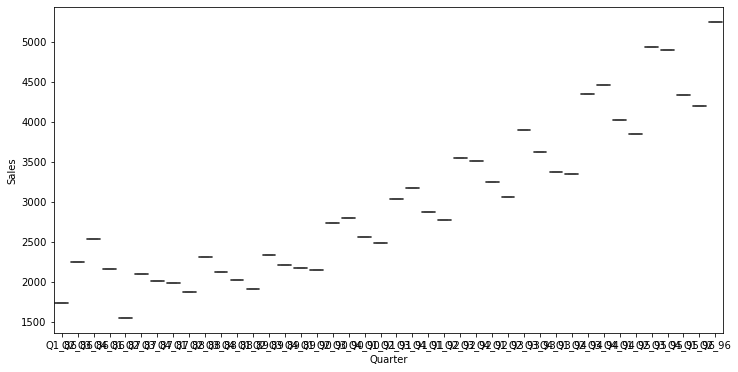

In [40]:
# Boxplot for ever
import seaborn as sns
plt.figure(figsize=(12,6))
plt.subplot()
sns.boxplot(x="Quarter",y="Sales",data=coco)

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Quarter",y="Sales",data=coco)

# Splitting Data

In [16]:
Train = cococola.head(35)
Test = cococola.tail(7)


In [17]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351146

In [11]:
#cococola["log_Sales"] = np.log(cococola["Sales"]) 
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales


In [18]:
#Exponential  
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

493.348648484222

In [19]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

511.8117319417341

In [20]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.870416425175

In [21]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.464139516367

In [22]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1938.9332351966177

In [23]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

339.1874666994813

In [24]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


# final model with least rmse values 

In [25]:
pred = {'quater':['Q1','Q2','Q3','Q4']}
df= pd.DataFrame(pred)
df 

,quater
0,Q1
1,Q2
2,Q3
3,Q4


In [26]:
t = np.arange(43,47)
df['t'] =t
df['t_square'] = df['t']*df['t']

In [27]:
dummy=pd.DataFrame(pd.get_dummies(df['quater']))
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [28]:
cocopred=pd.concat((df,dummy),axis=1)
cocopred

,quater,t,t_square,Q1,Q2,Q3,Q4
0,Q1,43,1849,1,0,0,0
1,Q2,44,1936,0,1,0,0
2,Q3,45,2025,0,0,1,0
3,Q4,46,2116,0,0,0,1


In [29]:
#Build the model on entire data set
model_full =  smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()

In [30]:
pred_new  = pd.Series(add_sea_Quad.predict(cocopred))
pred_new

0    5070.683662
1    5816.530360
2    5916.761283
3    5824.647373
dtype: float64

In [31]:
cocopred['forecasted_sales'] = pd.Series(pred_new)

In [32]:
cocopred

,quater,t,t_square,Q1,Q2,Q3,Q4,forecasted_sales
0,Q1,43,1849,1,0,0,0,5070.683662
1,Q2,44,1936,0,1,0,0,5816.530360
2,Q3,45,2025,0,0,1,0,5916.761283
3,Q4,46,2116,0,0,0,1,5824.647373


# AirlinePassenger

In [33]:
air = pd.read_csv('C:\Data Science\Forecasting\\airline-passengers.csv')

In [34]:
air

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [35]:
air['Date'] = pd.to_datetime(air.Month,format='%Y-%m')

In [36]:
air["month"] = air.Date.dt.strftime("%m") # month extraction
air["year"] = air.Date.dt.strftime("%Y") # year extraction 

In [37]:
air 

,Month,Passengers,Date,month,year
0,1949-01,112,1949-01-01,01,1949
1,1949-02,118,1949-02-01,02,1949
2,1949-03,132,1949-03-01,03,1949
3,1949-04,129,1949-04-01,04,1949
4,1949-05,121,1949-05-01,05,1949
...,...,...,...,...,...
139,1960-08,606,1960-08-01,08,1960
140,1960-09,508,1960-09-01,09,1960
141,1960-10,461,1960-10-01,10,1960
142,1960-11,390,1960-11-01,11,1960


<AxesSubplot:>

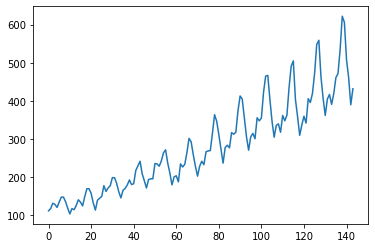

In [38]:
air.Passengers.plot()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

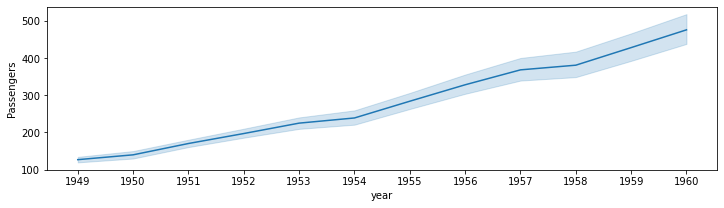

In [41]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

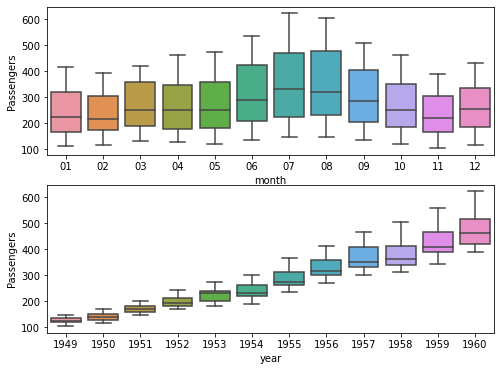

In [42]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)

In [43]:
dummy = pd.get_dummies(air['month'])
dummy

,01,02,03,04,05,06,07,08,09,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,0,1,0,0,0,0
140,0,0,0,0,0,0,0,0,1,0,0,0
141,0,0,0,0,0,0,0,0,0,1,0,0
142,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
t = np.arange(1,145)
air['t'] =t
air['t_square'] = air['t']*air['t']

In [61]:
ap = pd.concat((air,dummy),axis=1)
ap.tail(15)

,Month,Passengers,Date,month,year,t,t_square,log_Passengers,01,02,03,04,05,06,07,08,09,10,11,12
129,1959-10,407,1959-10-01,10,1959,130,16900,6.008813,0,0,0,0,0,0,0,0,0,1,0,0
130,1959-11,362,1959-11-01,11,1959,131,17161,5.891644,0,0,0,0,0,0,0,0,0,0,1,0
131,1959-12,405,1959-12-01,12,1959,132,17424,6.003887,0,0,0,0,0,0,0,0,0,0,0,1
132,1960-01,417,1960-01-01,01,1960,133,17689,6.033086,1,0,0,0,0,0,0,0,0,0,0,0
133,1960-02,391,1960-02-01,02,1960,134,17956,5.968708,0,1,0,0,0,0,0,0,0,0,0,0
134,1960-03,419,1960-03-01,03,1960,135,18225,6.037871,0,0,1,0,0,0,0,0,0,0,0,0
135,1960-04,461,1960-04-01,04,1960,136,18496,6.133398,0,0,0,1,0,0,0,0,0,0,0,0
136,1960-05,472,1960-05-01,05,1960,137,18769,6.156979,0,0,0,0,1,0,0,0,0,0,0,0
137,1960-06,535,1960-06-01,06,1960,138,19044,6.282267,0,0,0,0,0,1,0,0,0,0,0,0
138,1960-07,622,1960-07-01,07,1960,139,19321,6.432940,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
Train = air.head(135)
Test = air.tail(10)

In [50]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

86.21864295986067

In [46]:
#ap[""] = np.log(ap["Passengers"])
log_Passengers=np.log(air['Passengers'])
air['log_Passengers']=log_Passengers

In [51]:
#Exponential 
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

77.75073161273072

In [52]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

79.21726524322433

In [53]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

223.07018258620982

In [54]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+month',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

43.389293873410594

In [55]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~month',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

243.61833938191276

In [56]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~month+t',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

35.82211986965829

In [57]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,35.822120
4,rmse_add_sea_quad,43.389294
1,rmse_Exp,77.750732
2,rmse_Quad,79.217265
0,rmse_linear,86.218643
3,rmse_add_sea,223.070183
5,rmse_Mult_sea,243.618339


In [ ]:
#Buildin final model with least rmse values

In [93]:
pred = {'month':['01','02','03','04','05','06','07','08','09','10','11','12']}
df = pd.DataFrame(pred)
df

,month
0,01
1,02
2,03
3,04
4,05
5,06
6,07
7,08
8,09
9,10


In [94]:
dummy=pd.DataFrame(pd.get_dummies(df['month']))
dummy

,01,02,03,04,05,06,07,08,09,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [95]:
t = np.arange(143,155)
df['t'] =t
df['t_square'] = df['t']*df['t']

In [96]:
pred_data = pd.concat((df,dummy),axis=1)
pred_data

,month,t,t_square,01,02,03,04,05,06,07,08,09,10,11,12
0,01,143,20449,1,0,0,0,0,0,0,0,0,0,0,0
1,02,144,20736,0,1,0,0,0,0,0,0,0,0,0,0
2,03,145,21025,0,0,1,0,0,0,0,0,0,0,0,0
3,04,146,21316,0,0,0,1,0,0,0,0,0,0,0,0
4,05,147,21609,0,0,0,0,1,0,0,0,0,0,0,0
5,06,148,21904,0,0,0,0,0,1,0,0,0,0,0,0
6,07,149,22201,0,0,0,0,0,0,1,0,0,0,0,0
7,08,150,22500,0,0,0,0,0,0,0,1,0,0,0,0
8,09,151,22801,0,0,0,0,0,0,0,0,1,0,0,0
9,10,152,23104,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~month+t',data=air).fit()

In [98]:
pred_new  = pd.Series(Mul_Add_sea.predict(pred_data))
pred_new

0     6.176141
1     6.164155
2     6.304451
3     6.287607
4     6.293859
5     6.426704
6     6.537382
7     6.540595
8     6.409833
9     6.278924
10    6.148330
11    6.274233
dtype: float64

In [100]:
pred_data['forecasted_passengers'] = pd.Series(pred_new)
pred_data

,month,t,t_square,01,02,03,04,05,06,07,08,09,10,11,12,forecasted_passengers
0,01,143,20449,1,0,0,0,0,0,0,0,0,0,0,0,6.176141
1,02,144,20736,0,1,0,0,0,0,0,0,0,0,0,0,6.164155
2,03,145,21025,0,0,1,0,0,0,0,0,0,0,0,0,6.304451
3,04,146,21316,0,0,0,1,0,0,0,0,0,0,0,0,6.287607
4,05,147,21609,0,0,0,0,1,0,0,0,0,0,0,0,6.293859
5,06,148,21904,0,0,0,0,0,1,0,0,0,0,0,0,6.426704
6,07,149,22201,0,0,0,0,0,0,1,0,0,0,0,0,6.537382
7,08,150,22500,0,0,0,0,0,0,0,1,0,0,0,0,6.540595
8,09,151,22801,0,0,0,0,0,0,0,0,1,0,0,0,6.409833
9,10,152,23104,0,0,0,0,0,0,0,0,0,1,0,0,6.278924
